<a href="https://colab.research.google.com/github/kurek0010/data-science-bootcamp/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.26.4
Pandas: 2.2.2


### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-01-14 to 2020-01-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


### <a name='a3'></a> Eksploracja danych

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-14,220.4400,221.8200,216.2000,217.760,24711650
2025-01-13,218.0600,219.4000,216.4700,218.460,27262655
2025-01-10,221.4600,221.7100,216.5000,218.940,36811525
2025-01-08,223.1850,223.5200,220.2000,222.130,25033292
2025-01-07,227.9000,228.3810,221.4600,222.110,28084164
...,...,...,...,...,...
2020-01-24,94.5685,94.7495,92.3720,93.082,75323620
2020-01-23,94.2555,94.4990,93.6380,94.229,49692260
2020-01-22,94.8045,95.1250,94.1670,94.373,64325140


In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-14,220.440,221.820,216.20,217.76,24711650
2025-01-13,218.060,219.400,216.47,218.46,27262655
2025-01-10,221.460,221.710,216.50,218.94,36811525
2025-01-08,223.185,223.520,220.20,222.13,25033292
2025-01-07,227.900,228.381,221.46,222.11,28084164


In [5]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-14,220.44,221.82,216.20,217.76,24711650
2025-01-13,218.06,219.40,216.47,218.46,27262655
2025-01-10,221.46,221.71,216.50,218.94,36811525


In [6]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-24,94.5685,94.7495,92.3720,93.082,75323620
2020-01-23,94.2555,94.4990,93.6380,94.229,49692260
2020-01-22,94.8045,95.1250,94.1670,94.373,64325140
2020-01-21,93.2500,94.7135,93.0000,94.600,74155700
2020-01-17,94.2945,94.3320,92.8625,93.236,79946800


In [7]:
df.tail(2)

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-21,93.2500,94.7135,93.0000,94.600,74155700
2020-01-17,94.2945,94.3320,92.8625,93.236,79946800


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2025-01-14,220.440,221.820,216.20,217.76,24711650
2025-01-13,218.060,219.400,216.47,218.46,27262655
2025-01-10,221.460,221.710,216.50,218.94,36811525
2025-01-08,223.185,223.520,220.20,222.13,25033292
2025-01-07,227.900,228.381,221.46,222.11,28084164


In [10]:
df.describe()

,open,high,low,close,volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,147.683642,149.490259,145.755475,147.649029,6.826173e+07
std,32.289244,32.326709,32.119823,32.210410,3.419491e+07
min,82.075500,83.480000,81.301600,81.820000,1.500750e+07
25%,122.241000,123.713000,119.980000,121.981000,4.572418e+07
50%,154.760000,156.369000,152.500000,154.474000,5.995083e+07
75%,170.132000,172.032000,168.265000,170.410500,8.209107e+07
max,232.390000,233.000000,228.010000,232.930000,3.113457e+08


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1255.0,1.476836e+02,3.228924e+01,8.207550e+01,1.222410e+02,1.547600e+02,1.701320e+02,2.323900e+02
high,1255.0,1.494903e+02,3.232671e+01,8.348000e+01,1.237130e+02,1.563690e+02,1.720320e+02,2.330000e+02
low,1255.0,1.457555e+02,3.211982e+01,8.130160e+01,1.199800e+02,1.525000e+02,1.682650e+02,2.280100e+02
close,1255.0,1.476490e+02,3.221041e+01,8.182000e+01,1.219810e+02,1.544740e+02,1.704105e+02,2.329300e+02
volume,1255.0,6.826173e+07,3.419491e+07,1.500750e+07,4.572418e+07,5.995083e+07,8.209107e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [12]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2025-01-14,220.440,221.8200,216.20,217.76,24711650
2025-01-13,218.060,219.4000,216.47,218.46,27262655
2025-01-10,221.460,221.7100,216.50,218.94,36811525
2025-01-08,223.185,223.5200,220.20,222.13,25033292
2025-01-07,227.900,228.3810,221.46,222.11,28084164
2025-01-06,226.780,228.8350,224.84,227.61,31849831
2025-01-03,222.505,225.3600,221.62,224.19,27515606
2025-01-02,222.030,225.1500,218.19,220.22,33956579
2024-12-31,222.965,223.2299,218.94,219.39,24819655


In [13]:
df['open']

,open
Date,
2025-01-14,220.440
2025-01-13,218.060
2025-01-10,221.460
2025-01-08,223.185
2025-01-07,227.900
2025-01-06,226.780
2025-01-03,222.505
2025-01-02,222.030
2024-12-31,222.965


In [14]:
df.open

,open
Date,
2025-01-14,220.440
2025-01-13,218.060
2025-01-10,221.460
2025-01-08,223.185
2025-01-07,227.900
2025-01-06,226.780
2025-01-03,222.505
2025-01-02,222.030
2024-12-31,222.965


In [15]:
df[['open']]

,open
Date,
2025-01-14,220.440
2025-01-13,218.060
2025-01-10,221.460
2025-01-08,223.185
2025-01-07,227.900
2025-01-06,226.780
2025-01-03,222.505
2025-01-02,222.030
2024-12-31,222.965


In [16]:
df[['open', 'close']]

,open,close
Date,,
2025-01-14,220.440,217.76
2025-01-13,218.060,218.46
2025-01-10,221.460,218.94
2025-01-08,223.185,222.13
2025-01-07,227.900,222.11
2025-01-06,226.780,227.61
2025-01-03,222.505,224.19
2025-01-02,222.030,220.22
2024-12-31,222.965,219.39


In [17]:
df.iloc[:, 0]

,open
Date,
2025-01-14,220.440
2025-01-13,218.060
2025-01-10,221.460
2025-01-08,223.185
2025-01-07,227.900
2025-01-06,226.780
2025-01-03,222.505
2025-01-02,222.030
2024-12-31,222.965


In [18]:
df.iloc[:, [0,2]]

,open,low
Date,,
2025-01-14,220.440,216.20
2025-01-13,218.060,216.47
2025-01-10,221.460,216.50
2025-01-08,223.185,220.20
2025-01-07,227.900,221.46
2025-01-06,226.780,224.84
2025-01-03,222.505,221.62
2025-01-02,222.030,218.19
2024-12-31,222.965,218.94


In [19]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2025-01-14,220.440,217.76
2025-01-13,218.060,218.46
2025-01-10,221.460,218.94
2025-01-08,223.185,222.13
2025-01-07,227.900,222.11
2025-01-06,226.780,227.61
2025-01-03,222.505,224.19
2025-01-02,222.030,220.22
2024-12-31,222.965,219.39


In [20]:
df.iloc[:, 2:5]

,low,close,volume
Date,,,
2025-01-14,216.20,217.76,24711650
2025-01-13,216.47,218.46,27262655
2025-01-10,216.50,218.94,36811525
2025-01-08,220.20,222.13,25033292
2025-01-07,221.46,222.11,28084164
2025-01-06,224.84,227.61,31849831
2025-01-03,221.62,224.19,27515606
2025-01-02,218.19,220.22,33956579
2024-12-31,218.94,219.39,24819655


In [21]:
df.iloc[:, -1]

,volume
Date,
2025-01-14,24711650
2025-01-13,27262655
2025-01-10,36811525
2025-01-08,25033292
2025-01-07,28084164
2025-01-06,31849831
2025-01-03,27515606
2025-01-02,33956579
2024-12-31,24819655


In [22]:
df.iloc[:, [-1]]

,volume
Date,
2025-01-14,24711650
2025-01-13,27262655
2025-01-10,36811525
2025-01-08,25033292
2025-01-07,28084164
2025-01-06,31849831
2025-01-03,27515606
2025-01-02,33956579
2024-12-31,24819655


In [23]:
df.iloc[:, :-1]

,open,high,low,close
Date,,,,
2025-01-14,220.440,221.8200,216.20,217.76
2025-01-13,218.060,219.4000,216.47,218.46
2025-01-10,221.460,221.7100,216.50,218.94
2025-01-08,223.185,223.5200,220.20,222.13
2025-01-07,227.900,228.3810,221.46,222.11
2025-01-06,226.780,228.8350,224.84,227.61
2025-01-03,222.505,225.3600,221.62,224.19
2025-01-02,222.030,225.1500,218.19,220.22
2024-12-31,222.965,223.2299,218.94,219.39


In [24]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2025-01-14,216.20,217.76,24711650
2025-01-13,216.47,218.46,27262655
2025-01-10,216.50,218.94,36811525
2025-01-08,220.20,222.13,25033292
2025-01-07,221.46,222.11,28084164
2025-01-06,224.84,227.61,31849831
2025-01-03,221.62,224.19,27515606
2025-01-02,218.19,220.22,33956579
2024-12-31,218.94,219.39,24819655


### <a name='a5'></a>  Selekcja wierszy

In [25]:
df

,open,high,low,close,volume
Date,,,,,
2025-01-14,220.440,221.8200,216.20,217.76,24711650
2025-01-13,218.060,219.4000,216.47,218.46,27262655
2025-01-10,221.460,221.7100,216.50,218.94,36811525
2025-01-08,223.185,223.5200,220.20,222.13,25033292
2025-01-07,227.900,228.3810,221.46,222.11,28084164
2025-01-06,226.780,228.8350,224.84,227.61,31849831
2025-01-03,222.505,225.3600,221.62,224.19,27515606
2025-01-02,222.030,225.1500,218.19,220.22,33956579
2024-12-31,222.965,223.2299,218.94,219.39,24819655


In [26]:
df.iloc[0]

,2025-01-14
open,220.44
high,221.82
low,216.20
close,217.76
volume,24711650.00


In [27]:
df.iloc[:4]

,open,high,low,close,volume
Date,,,,,
2025-01-14,220.440,221.82,216.20,217.76,24711650
2025-01-13,218.060,219.40,216.47,218.46,27262655
2025-01-10,221.460,221.71,216.50,218.94,36811525
2025-01-08,223.185,223.52,220.20,222.13,25033292


In [53]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-14,66.170,66.810,64.620,64.84,25735753
2025-01-13,65.155,67.195,65.020,65.70,23960107
2025-01-10,64.500,66.600,63.960,65.97,30728846
2025-01-08,66.400,66.680,64.120,64.91,24523299
2025-01-07,68.490,68.840,65.950,66.15,35347776
...,...,...,...,...,...
2020-01-24,37.500,37.665,36.250,36.80,21598009
2020-01-23,36.970,37.950,36.725,37.40,21365954
2020-01-22,37.940,37.940,36.920,37.04,29765240


In [30]:
df.loc['2025-01-14']

,2025-01-14
open,220.44
high,221.82
low,216.20
close,217.76
volume,24711650.00


In [51]:
df.loc[['2025-01-06']]

,open,high,low,close,volume
Date,,,,,
2025-01-06,226.78,228.835,224.84,227.61,31849831


### <a name='a6'></a> Obliczanie nowych kolumn

In [52]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-01-14 to 2020-01-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [54]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-14,66.170,66.810,64.62,64.84,25735753
2025-01-13,65.155,67.195,65.02,65.70,23960107
2025-01-10,64.500,66.600,63.96,65.97,30728846
2025-01-08,66.400,66.680,64.12,64.91,24523299
2025-01-07,68.490,68.840,65.95,66.15,35347776


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1255.0,4.547068e+01,1.606526e+01,15.96,3.218000e+01,42.72,5.703500e+01,8.564000e+01
High,1255.0,4.628926e+01,1.614365e+01,17.80,3.291500e+01,43.53,5.800500e+01,8.700000e+01
Low,1255.0,4.460218e+01,1.590207e+01,13.71,3.144500e+01,42.11,5.582000e+01,8.418000e+01
Close,1255.0,4.544552e+01,1.600342e+01,14.82,3.231000e+01,42.87,5.710000e+01,8.634000e+01
Volume,1255.0,2.495288e+07,1.712743e+07,5200356.00,1.590532e+07,20835269.00,2.853284e+07,3.642612e+08


In [57]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-14,66.170,66.810,64.62,64.84,25735753
2025-01-13,65.155,67.195,65.02,65.70,23960107
2025-01-10,64.500,66.600,63.96,65.97,30728846


In [58]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-01-14,66.170,66.810,64.62,64.84,25735753,65.5050
2025-01-13,65.155,67.195,65.02,65.70,23960107,65.4275
2025-01-10,64.500,66.600,63.96,65.97,30728846,65.2350
2025-01-08,66.400,66.680,64.12,64.91,24523299,65.6550
2025-01-07,68.490,68.840,65.95,66.15,35347776,67.3200


In [59]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-01-17,34.97,35.250,34.650,35.13,17251231,35.050
2020-01-21,35.50,37.800,35.410,37.60,48746661,36.550
2020-01-22,37.94,37.940,36.920,37.04,29765240,37.490
2020-01-23,36.97,37.950,36.725,37.40,21365954,37.185
2020-01-24,37.50,37.665,36.250,36.80,21598009,37.150


In [60]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2020-01-17,34.97,35.250,34.650,35.13,17251231,35.050,NaN
2020-01-21,35.50,37.800,35.410,37.60,48746661,36.550,35.13
2020-01-22,37.94,37.940,36.920,37.04,29765240,37.490,37.60
2020-01-23,36.97,37.950,36.725,37.40,21365954,37.185,37.04
2020-01-24,37.50,37.665,36.250,36.80,21598009,37.150,37.40


In [64]:
df['Daily_Change'] = df.Close / df.Close_shift -1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change,Daily Change
Date,,,,,,,,,
2020-01-17,34.97,35.250,34.650,35.13,17251231,35.050,NaN,NaN,NaN
2020-01-21,35.50,37.800,35.410,37.60,48746661,36.550,35.13,0.070310,1.070310
2020-01-22,37.94,37.940,36.920,37.04,29765240,37.490,37.60,-0.014894,0.985106
2020-01-23,36.97,37.950,36.725,37.40,21365954,37.185,37.04,0.009719,1.009719
2020-01-24,37.50,37.665,36.250,36.80,21598009,37.150,37.40,-0.016043,0.983957


In [65]:
del df['Daily Change']

In [66]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-01-17,34.97,35.250,34.650,35.13,17251231,35.050,NaN,NaN
2020-01-21,35.50,37.800,35.410,37.60,48746661,36.550,35.13,0.070310
2020-01-22,37.94,37.940,36.920,37.04,29765240,37.490,37.60,-0.014894
2020-01-23,36.97,37.950,36.725,37.40,21365954,37.185,37.04,0.009719
2020-01-24,37.50,37.665,36.250,36.80,21598009,37.150,37.40,-0.016043


In [67]:
df.Daily_Change.min()

-0.21628767847699626

In [68]:
df.Daily_Change.max()

0.3825910931174088

<Axes: >

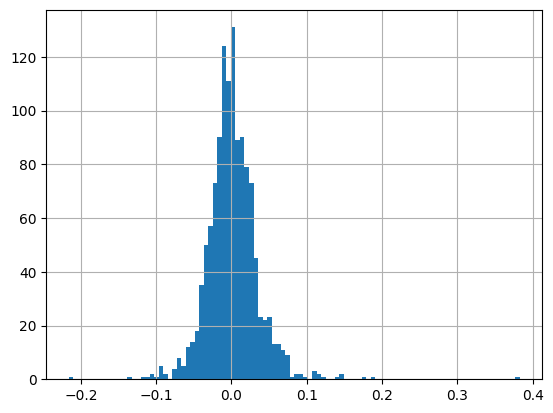

In [69]:
df.Daily_Change.hist(bins=100)

<Axes: >

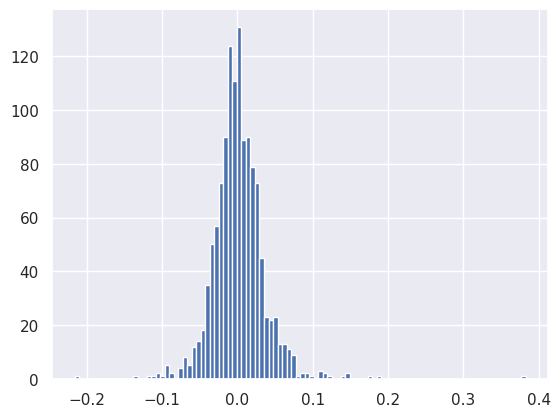

In [70]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

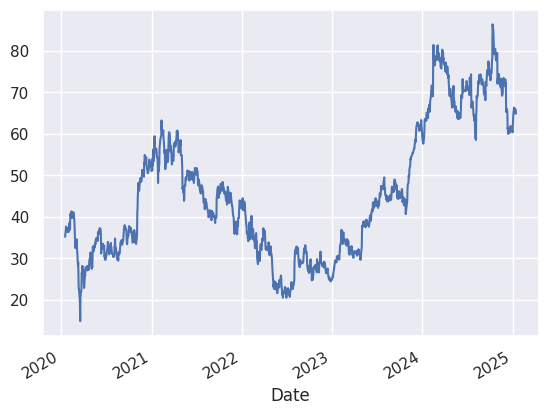

In [71]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [72]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-01-17,34.970,35.250,34.650,35.13,17251231,35.0500,NaN,NaN
2020-01-21,35.500,37.800,35.410,37.60,48746661,36.5500,35.13,0.070310
2020-01-22,37.940,37.940,36.920,37.04,29765240,37.4900,37.60,-0.014894
2020-01-23,36.970,37.950,36.725,37.40,21365954,37.1850,37.04,0.009719
2020-01-24,37.500,37.665,36.250,36.80,21598009,37.1500,37.40,-0.016043
...,...,...,...,...,...,...,...,...
2025-01-07,68.490,68.840,65.950,66.15,35347776,67.3200,66.31,-0.002413
2025-01-08,66.400,66.680,64.120,64.91,24523299,65.6550,66.15,-0.018745
2025-01-10,64.500,66.600,63.960,65.97,30728846,65.2350,64.91,0.016330


In [73]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-01-21,35.50,37.80,35.410,37.60,48746661,36.550,35.13,0.070310
2020-01-23,36.97,37.95,36.725,37.40,21365954,37.185,37.04,0.009719
2020-01-28,37.14,37.33,36.040,37.01,28973963,37.075,36.30,0.019559
2020-02-03,36.75,37.64,36.530,37.59,23537344,37.170,36.29,0.035823
2020-02-04,37.87,38.99,37.260,38.53,32425930,38.200,37.59,0.025007
...,...,...,...,...,...,...,...,...
2024-12-23,60.89,62.22,60.760,61.87,16093552,61.380,60.73,0.018772
2025-01-02,62.19,63.39,61.310,63.17,25899072,62.680,60.32,0.047248
2025-01-03,63.69,65.22,63.440,64.59,28553825,64.140,63.17,0.022479


In [74]:
df_positive.Daily_Change.mean()

0.025266287874035148

In [75]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-01-22,37.940,37.9400,36.92,37.04,29765240,37.4900,37.60,-0.014894
2020-01-24,37.500,37.6650,36.25,36.80,21598009,37.1500,37.40,-0.016043
2020-01-27,35.230,36.6500,34.19,36.30,18817966,35.7650,36.80,-0.013587
2020-01-29,36.980,37.5650,36.80,36.99,16882299,36.9850,37.01,-0.000540
2020-01-30,36.820,37.1319,35.95,36.68,22846954,36.7500,36.99,-0.008381
...,...,...,...,...,...,...,...,...
2024-12-31,61.000,61.1000,60.17,60.32,14487281,60.6600,60.77,-0.007405
2025-01-07,68.490,68.8400,65.95,66.15,35347776,67.3200,66.31,-0.002413
2025-01-08,66.400,66.6800,64.12,64.91,24523299,65.6550,66.15,-0.018745


In [76]:
 df_negative.Daily_Change.mean()

-0.022324415025937013

In [77]:
df.Close == df.High

,0
Date,
2020-01-17,False
2020-01-21,False
2020-01-22,False
2020-01-23,False
2020-01-24,False
...,...
2025-01-07,False
2025-01-08,False
2025-01-10,False


In [78]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [79]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [80]:
df.index

DatetimeIndex(['2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2024-12-30', '2024-12-31', '2025-01-02', '2025-01-03',
               '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-10',
               '2025-01-13', '2025-01-14'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)

In [81]:
df.index > '2022-11-01'

array([False, False, False, ...,  True,  True,  True])

In [82]:
df[df.index > '2022-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2022-11-02,29.570,30.160,28.630,28.81,37083453,29.1900,29.75,-0.031597
2022-11-03,28.030,29.520,27.710,28.73,28033212,28.3800,28.81,-0.002777
2022-11-04,29.440,29.725,28.040,28.39,22304190,28.9150,28.73,-0.011834
2022-11-07,28.705,28.825,27.615,27.69,19204075,28.1975,28.39,-0.024657
2022-11-08,27.570,28.330,26.820,27.44,27033898,27.5050,27.69,-0.009029
...,...,...,...,...,...,...,...,...
2025-01-07,68.490,68.840,65.950,66.15,35347776,67.3200,66.31,-0.002413
2025-01-08,66.400,66.680,64.120,64.91,24523299,65.6550,66.15,-0.018745
2025-01-10,64.500,66.600,63.960,65.97,30728846,65.2350,64.91,0.016330


In [83]:
df[(df.index >= '2022-11-01') & (df.index < '2022-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2022-11-01,30.070,30.9999,29.120,29.75,87994014,29.9100,26.57,0.119684
2022-11-02,29.570,30.1600,28.630,28.81,37083453,29.1900,29.75,-0.031597
2022-11-03,28.030,29.5200,27.710,28.73,28033212,28.3800,28.81,-0.002777
2022-11-04,29.440,29.7250,28.040,28.39,22304190,28.9150,28.73,-0.011834
2022-11-07,28.705,28.8250,27.615,27.69,19204075,28.1975,28.39,-0.024657
2022-11-08,27.570,28.3300,26.820,27.44,27033898,27.5050,27.69,-0.009029
2022-11-09,27.310,28.0050,26.440,26.55,21186266,26.9300,27.44,-0.032434
2022-11-10,28.380,29.3200,28.100,28.85,35196917,28.6150,26.55,0.086629
2022-11-11,28.950,30.4350,28.700,29.15,35861055,29.0500,28.85,0.010399


In [85]:
df[(df.index == '2022-11-01') | (df.index == '2022-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2022-11-01,30.070,30.9999,29.120,29.75,87994014,29.9100,26.57,0.119684
2022-11-07,28.705,28.8250,27.615,27.69,19204075,28.1975,28.39,-0.024657


In [86]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-01-17,34.970,35.250,34.650,35.13,17251231,35.0500,NaN,NaN
2020-01-21,35.500,37.800,35.410,37.60,48746661,36.5500,35.13,0.070310
2020-01-22,37.940,37.940,36.920,37.04,29765240,37.4900,37.60,-0.014894
2020-01-23,36.970,37.950,36.725,37.40,21365954,37.1850,37.04,0.009719
2020-01-24,37.500,37.665,36.250,36.80,21598009,37.1500,37.40,-0.016043
...,...,...,...,...,...,...,...,...
2025-01-07,68.490,68.840,65.950,66.15,35347776,67.3200,66.31,-0.002413
2025-01-08,66.400,66.680,64.120,64.91,24523299,65.6550,66.15,-0.018745
2025-01-10,64.500,66.600,63.960,65.97,30728846,65.2350,64.91,0.016330


In [87]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-05-01,29.13,29.7200,28.325,28.39,19290192,28.760,30.27,-0.062108
2020-05-04,27.56,28.0700,26.580,27.42,23428333,27.490,28.39,-0.034167
2020-05-05,28.25,28.9088,27.440,28.07,30725371,28.160,27.42,0.023705
2020-05-06,27.50,28.0600,26.810,27.82,31076451,27.660,28.07,-0.008906
2020-05-07,29.60,31.6500,29.580,30.93,62229496,30.265,27.82,0.111790
...,...,...,...,...,...,...,...,...
2024-05-24,63.78,64.7600,63.620,64.26,10385892,64.020,63.60,0.010377
2024-05-28,64.61,64.6100,63.100,63.52,14213346,64.065,64.26,-0.011516
2024-05-29,63.01,65.3650,62.910,64.93,16987906,63.970,63.52,0.022198


In [88]:
df[df.index.year == 2023]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2023-01-03,25.37,25.750,25.0200,25.36,22155275,25.365,24.73,0.025475
2023-01-04,25.73,25.970,25.3200,25.91,14815960,25.820,25.36,0.021688
2023-01-05,25.73,26.010,25.5500,25.55,9942038,25.640,25.91,-0.013894
2023-01-06,25.86,26.540,25.4000,26.40,19443753,26.130,25.55,0.033268
2023-01-09,27.30,28.050,27.1500,27.40,24962057,27.350,26.40,0.037879
...,...,...,...,...,...,...,...,...
2023-12-22,61.70,62.235,61.2800,61.71,14715609,61.705,61.46,0.004068
2023-12-26,61.71,62.200,61.3136,61.98,16077192,61.845,61.71,0.004375
2023-12-27,62.00,63.430,62.0000,63.28,20805951,62.640,61.98,0.020975


In [89]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
2020-10-01,36.860,37.8282,36.5800,37.14,19187502,37.0000,36.48,0.018092
2020-12-01,50.000,51.4100,49.0700,49.63,20619101,49.8150,49.66,-0.000604
2021-02-01,52.120,52.9000,51.3500,52.76,15570904,52.4400,50.93,0.035932
2021-03-01,53.670,54.7600,53.3000,54.40,18481137,54.0350,51.75,0.051208


In [90]:
import pandas as pd
import pandas_datareader.data as web


df = web.DataReader(name='META', data_source='stooq')
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-14,605.065,605.4900,588.550,594.25,13597992
2025-01-13,607.100,608.9700,598.445,608.33,10785031
2025-01-10,610.030,629.9100,597.340,615.86,19256564
2025-01-08,613.395,616.4397,602.790,610.72,10085846
2025-01-07,631.700,632.1011,608.230,617.89,12071479
...,...,...,...,...,...
2020-01-24,220.800,221.7800,216.110,217.94,11905824
2020-01-23,220.750,221.4850,219.270,219.76,11195000
2020-01-22,222.310,222.7500,221.280,221.32,12212814
